In [1]:
from keras.datasets import cifar100

C:\Users\awant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 217s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

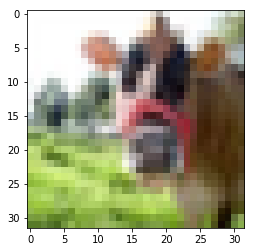

In [9]:
plt.imshow(x_train[0])

In [12]:
y_train.shape

(50000, 1)

In [13]:
import keras
n_classes = 100

In [14]:
y_train = keras.utils.to_categorical(y_train)

In [18]:
y_test = keras.utils.to_categorical(y_test)

In [19]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [20]:
model = Sequential()

In [22]:
x_train.shape[1:]

(32, 32, 3)

In [26]:
x_train[0].reshape(32*32*3).shape

(3072,)

In [27]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))

In [28]:
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [29]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3686912   
__________

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
y_train /= 255

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=2)

Epoch 1/10
